In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
#laod data
df=pd.read_csv(r'complaints-2021-12-16_11_19.csv')

In [3]:
len(df)

487924

In [4]:
#check loaded data
df.head(10)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,12/12/21,"Payday loan, title loan, or personal loan",Installment loan,Struggling to pay your loan,None,NaN,None,"LDF Holdings, LLC",OR,97305,Older American,Other,Web,12/12/21,Closed with explanation,Yes,NaN,5000878
1,12/09/21,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,None,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,77005,None,Other,Web,12/09/21,In progress,Yes,NaN,4992718
2,11/29/21,Debt collection,Credit card debt,Attempts to collect debt not owed,Debt was result of identity theft,NaN,None,"Affirm Holdings, Inc",NY,10704,None,None,Web,11/29/21,Closed with explanation,Yes,NaN,4956345
3,12/02/21,Debt collection,Other debt,Communication tactics,"Used obscene, profane, or other abusive language",NaN,Company has responded to the consumer and the ...,"I.C. System, Inc.",GA,30906,None,Other,Web,12/02/21,Closed with explanation,Yes,NaN,4971206
4,12/13/21,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,NaN,None,"EQUIFAX, INC.",DC,20011,None,None,Web,12/13/21,In progress,Yes,NaN,5001022
5,11/19/21,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,None,"Credence Resource Management, LLC",NY,11010,None,None,Web,12/14/21,In progress,Yes,NaN,4929902
6,11/12/21,Debt collection,Medical debt,Attempts to collect debt not owed,Debt is not yours,NaN,None,"Kinum, Inc., Indianapolis, IN Branch",IL,60620,Older American,NaN,Phone,11/12/21,Closed with explanation,Yes,NaN,4903716
7,12/13/21,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,NaN,None,"EQUIFAX, INC.",AZ,85392,None,None,Web,12/13/21,In progress,Yes,NaN,5000977
8,06/15/21,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,None,"EQUIFAX, INC.",FL,33064,None,Consent not provided,Web,06/15/21,Closed with explanation,Yes,NaN,4460854
9,11/29/21,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,None,ENCORE CAPITAL GROUP INC.,PA,19124,None,None,Web,11/29/21,Closed with explanation,Yes,NaN,4956396


In [5]:
#Check the column names
df.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [6]:
#creating new dataset with required columns and renaming
Filtered_df = df.filter(['Date received','Consumer complaint narrative'], axis=1)
Filtered_df.columns = ['Date_received','Customer_complaint']

In [7]:
#setting display to avoid data trimming
#pd.set_option('display.max_colwidth', None)

In [8]:
Filtered_df.head(50)

,Date_received,Customer_complaint
0,12/12/21,NaN
1,12/09/21,NaN
2,11/29/21,NaN
3,12/02/21,NaN
4,12/13/21,NaN
5,11/19/21,NaN
6,11/12/21,NaN
7,12/13/21,NaN
8,06/15/21,NaN
9,11/29/21,NaN


In [9]:
#remove null value rows
Filtered_df.dropna(subset = ["Customer_complaint"], inplace=True)

In [10]:
#validate after removing null values
len(Filtered_df)

173884

In [11]:
#reset index after null row removal
Filtered_df=Filtered_df.reset_index(drop=True)

In [12]:
#sample data check
Filtered_df.head(10)

,Date_received,Customer_complaint
0,02/22/21,On XX/XX/2019 my bill did not go through accou...
1,04/03/21,ATTN Collections Dept I am submitting a compla...
2,05/04/21,I have made several payments that have been de...
3,07/17/21,In XXXX I applied for a loan on line asking fo...
4,07/07/21,I have been harassed via phone by XXXX XXXX wi...
5,09/26/21,"In XXXX, I sent a paper pay check, to the Bank..."
6,03/03/21,this is ignoring my rights are consumer. I sen...
7,04/20/21,I have no a knowledge of this account accordin...
8,06/24/21,Hello - I received a predatory call from Great...
9,07/14/21,I mailed my dispute letters to the credit bure...


In [13]:
#converting to lower case
Filtered_df['Customer_complaint'] = Filtered_df['Customer_complaint'].str.lower()

#removing white space
Filtered_df['Customer_complaint'] = Filtered_df['Customer_complaint'].str.replace('[^\w\s]','')

#removing the repeated masked character
Filtered_df['Customer_complaint'] = Filtered_df['Customer_complaint'].str.replace('xxxx','')

#removing new line
Filtered_df['Customer_complaint'] = Filtered_df['Customer_complaint'].str.replace('[\n]','')

In [14]:
#data after proprocessing
Filtered_df.head(10)

,Date_received,Customer_complaint
0,02/22/21,on 2019 my bill did not go through account wit...
1,04/03/21,attn collections dept i am submitting a compla...
2,05/04/21,i have made several payments that have been de...
3,07/17/21,in i applied for a loan on line asking for t...
4,07/07/21,i have been harassed via phone by with avid ...
5,09/26/21,in i sent a paper pay check to the bankbymail...
6,03/03/21,this is ignoring my rights are consumer i sent...
7,04/20/21,i have no a knowledge of this account accordin...
8,06/24/21,hello i received a predatory call from great ...
9,07/14/21,i mailed my dispute letters to the credit bure...


In [15]:
#converting to datetime_format
Filtered_df.Date_received = pd.to_datetime(Filtered_df.Date_received, format='%m/%d/%Y',infer_datetime_format=True)

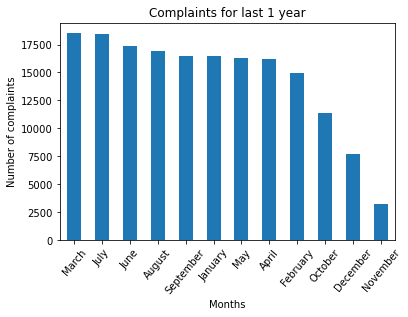

In [16]:
#barplot for monthwise complaints
import matplotlib.pyplot as plt
Filtered_df.groupby(Filtered_df['Date_received'].dt.strftime('%B')).size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel('Months')
plt.ylabel('Number of complaints')
plt.title('Complaints for last 1 year')
plt.show()


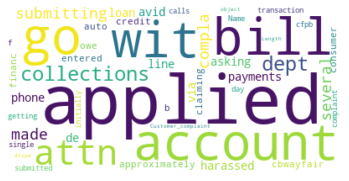

In [17]:
#WordCloud for entire dataset
from wordcloud import WordCloud
from nltk.corpus import stopwords

stop_words=set(stopwords.words('english'))

wordcloud = WordCloud(stopwords=stop_words, max_words=200, background_color="white").generate(str(Filtered_df['Customer_complaint']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [18]:
#Lemmatisation

import nltk
from nltk.stem import WordNetLemmatizer  
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
#nltk.download('wordnet')


def clean_text(Customer_complaint):
  le=WordNetLemmatizer()
  word_tokens=word_tokenize(Customer_complaint)
  tokens=[le.lemmatize(w) for w in word_tokens if w not in stop_words and len(w)>3]
  cleaned_text=" ".join(tokens)
  return cleaned_text

In [19]:
#Applying changes
Filtered_df['Customer_complaint']=Filtered_df['Customer_complaint'].apply(clean_text)

In [20]:
Filtered_df.head(10)

,Date_received,Customer_complaint
0,2021-02-22,2019 bill account missed payment kindly reques...
1,2021-04-03,attn collection dept submitting complaint refe...
2,2021-05-04,made several payment deemed ineligible towards...
3,2021-07-17,applied loan line asking loan acct first numbe...
4,2021-07-07,harassed phone avid acceptance previous loan c...
5,2021-09-26,sent paper check bankbymail address bank 19000...
6,2021-03-03,ignoring right consumer sent dispute inaccurat...
7,2021-04-20,knowledge account according fcra item must rem...
8,2021-06-24,hello received predatory call great lake educa...
9,2021-07-14,mailed dispute letter credit bureau 2021 day s...


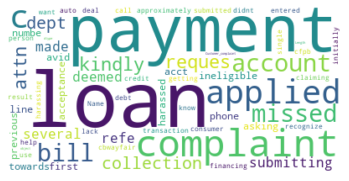

In [21]:
#wordcloud after applying changes
wordcloud = WordCloud(stopwords=stop_words, max_words=200, background_color="white").generate(str(Filtered_df['Customer_complaint']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [22]:
# vectorizers for creating the document-term-matrix (DTM)
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
vectorizer_tf = TfidfVectorizer(stop_words=stop_words,min_df=200, max_features=1000)
vect_text=vectorizer_tf.fit_transform(Filtered_df['Customer_complaint'])

In [23]:
print(vect_text.shape)
print(vect_text)

(173884, 1000)
  (0, 352)	0.2698094062801227
  (0, 831)	0.32864336285670875
  (0, 992)	0.15075511879482037
  (0, 758)	0.10205340372169214
  (0, 240)	0.08610968622475992
  (0, 752)	0.17261990640240046
  (0, 60)	0.2852238299141099
  (0, 110)	0.16941302576898942
  (0, 765)	0.22368375233753404
  (0, 643)	0.3002634494547722
  (0, 565)	0.5843204079680789
  (0, 21)	0.09166665735484561
  (0, 125)	0.22218156907854245
  (0, 7)	0.3152747685190282
  (1, 380)	0.1424489946841575
  (1, 532)	0.12811168362578082
  (1, 894)	0.11972001703874999
  (1, 191)	0.1269962579802997
  (1, 727)	0.10987616085134234
  (1, 741)	0.1496163184812548
  (1, 199)	0.1383821636645723
  (1, 349)	0.12364189099885566
  (1, 251)	0.07618491191304876
  (1, 773)	0.1253285357452059
  (1, 768)	0.1539591532990317
  :	:
  (173882, 738)	0.12643200186881642
  (173882, 214)	0.0992940910162379
  (173882, 423)	0.18630350213466748
  (173882, 570)	0.0824483691317205
  (173882, 986)	0.09629593718744625
  (173882, 275)	0.14828614530838338
  (17

In [24]:
#checking the high and low vectorized value

idf=vectorizer_tf.idf_
dd=dict(zip(vectorizer_tf.get_feature_names(), idf))
l=sorted(dd, key=(dd).get)

print("The most common word in dataset:-",l[0])
print("The least common word in dataset:-",l[-1])


The most common word in dataset:- credit
The least common word in dataset:- obligor


# TOPIC MODELLING

## LSA

In [25]:
from sklearn.decomposition import TruncatedSVD
lsa_model = TruncatedSVD(n_components=6, algorithm='randomized', n_iter=25, random_state=55)
lsa_top=lsa_model.fit_transform(vect_text)

In [26]:
#shows no of documents and no of topics

print(lsa_top)
print(lsa_top.shape)  

[[ 2.00352622e-01  1.39391038e-01  2.27108783e-02 -5.88097100e-02
   1.04904843e-01 -7.85285852e-05]
 [ 2.47528425e-01 -9.36942727e-02 -5.80686879e-02  2.81278979e-01
  -7.57417171e-02 -4.00911552e-02]
 [ 1.74652814e-01  2.47439340e-01  6.35193489e-02  3.06915612e-02
   1.18699576e-01 -1.62996297e-01]
 ...
 [ 2.93894348e-01 -5.18302104e-02 -6.23021141e-02  2.17567188e-01
  -6.30877079e-02 -4.27846588e-02]
 [ 1.57092826e-01  1.73215545e-01  5.91731507e-02  2.05957366e-03
  -3.27663179e-02 -6.25614323e-02]
 [ 8.44905389e-02  8.71919727e-02  3.27691346e-02  2.35873586e-03
  -6.76046516e-02 -3.97749077e-02]]
(173884, 6)


In [27]:
#shows no of topics and no of words

print(lsa_model.components_.shape) 
print(lsa_model.components_)

(6, 1000)
[[ 0.00523935  0.0102472   0.01269551 ...  0.0349664   0.00888189
   0.05308829]
 [ 0.01011188  0.00904816 -0.01730761 ... -0.03524053  0.00278275
   0.06261532]
 [ 0.00111287 -0.00150932 -0.0147104  ...  0.10318155  0.00427514
  -0.00011088]
 [-0.00172394  0.00163413  0.02150659 ... -0.0313929   0.00385989
   0.00773914]
 [-0.00379695 -0.00611086  0.00538321 ... -0.05337037 -0.00061178
   0.00998681]
 [ 0.00247361  0.00226884 -0.01022223 ... -0.01187619  0.00055782
  -0.02187218]]


In [28]:
# most important words for each topic

vocab = vectorizer_tf.get_feature_names()

for i, comp in enumerate(lsa_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
credit account report information reporting payment debt company letter bureau 

Topic 1: 
payment bank loan card told would call mortgage late called 

Topic 2: 
day item deleted immediately received dispute response letter payment ignored 

Topic 3: 
debt collection consumer alleged company reporting proof violation agency validation 

Topic 4: 
inquiry credit payment late report reporting bureau loan inaccurate score 

Topic 5: 
account balance closed bank opened card name open credit dispute 



In [29]:
#shows the documents and the dominant topic for the document

colnames_lsa = ["Topic" + str(i) for i in range(lsa_model.n_components)]
# docnames = ["Doc" + str(i) for i in range(len(X_train.complaints))]
docnames_lsa = ["Doc" + str(i) for i in range(len(Filtered_df['Customer_complaint']))]
df_doc_topic_lsa = pd.DataFrame(np.round(lsa_top, 2), columns=colnames_lsa, index=docnames_lsa)
significant_topic_lsa = np.argmax(df_doc_topic_lsa.values, axis=1)
df_doc_topic_lsa['dominant_topic_lsa'] = significant_topic_lsa

df_doc_topic_lsa

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,dominant_topic_lsa
Doc0,0.20,0.14,0.02,-0.06,0.10,-0.00,0
Doc1,0.25,-0.09,-0.06,0.28,-0.08,-0.04,3
Doc2,0.17,0.25,0.06,0.03,0.12,-0.16,1
Doc3,0.32,0.27,0.10,0.01,0.02,-0.11,0
Doc4,0.23,0.23,0.03,0.07,-0.05,-0.16,0
...,...,...,...,...,...,...,...
Doc173879,0.22,0.06,0.04,-0.01,-0.01,0.04,0
Doc173880,0.18,-0.09,-0.06,0.15,-0.03,0.02,0
Doc173881,0.29,-0.05,-0.06,0.22,-0.06,-0.04,0
Doc173882,0.16,0.17,0.06,0.00,-0.03,-0.06,1


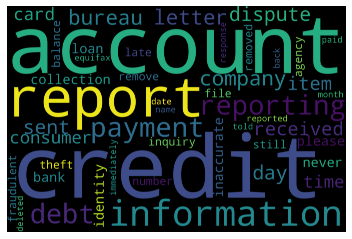

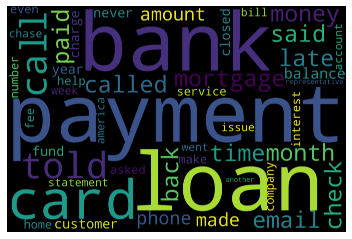

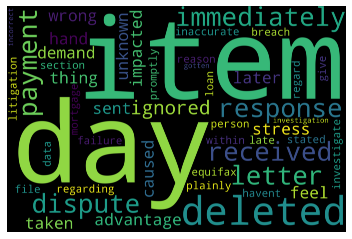

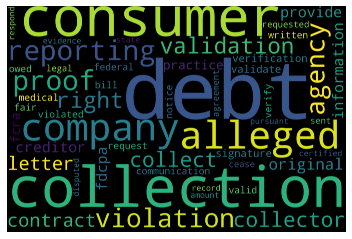

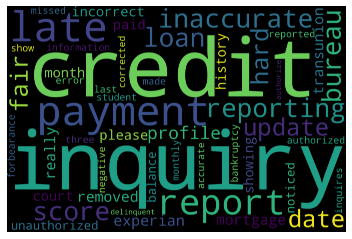

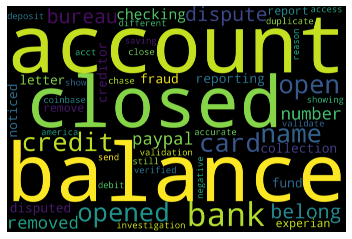

In [30]:
# Generate a word cloud image for given topic

def draw_word_cloud1(index):
  imp_words_topic=""
  comp=lsa_model.components_[index]
  vocab_comp = zip(vocab, comp)
  sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:50]
  for word in sorted_words:
    imp_words_topic=imp_words_topic+" "+word[0]

  wordcloud = WordCloud(width=6000, height=4000).generate(imp_words_topic)
  plt.figure( figsize=(5,5))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout()
  plt.show()
 
draw_word_cloud1(0)
draw_word_cloud1(1)
draw_word_cloud1(2)
draw_word_cloud1(3)
draw_word_cloud1(4)
draw_word_cloud1(5)

# LDA

In [31]:
from sklearn import decomposition
lda_model = decomposition.LatentDirichletAllocation(n_components=6, max_iter=25, learning_method='online', learning_offset=50, n_jobs=-1, random_state=111)

lda_top = lda_model.fit_transform(vect_text)


In [32]:
#shows no of documents and no of topics

print(lda_top)
print(lda_top.shape)  

[[0.03933067 0.0392954  0.80361827 0.03912881 0.03952805 0.03909879]
 [0.02149192 0.0214647  0.02147276 0.89248782 0.0214892  0.0215936 ]
 [0.02796091 0.02800081 0.85947787 0.02898699 0.02783743 0.02773599]
 ...
 [0.02648336 0.0267363  0.02678353 0.86412224 0.02665496 0.0292196 ]
 [0.02802328 0.65284202 0.23487392 0.02795516 0.02794335 0.02836227]
 [0.04436403 0.77792003 0.04460996 0.04427128 0.04448421 0.04435049]]
(173884, 6)


In [34]:
#shows no of topics and no of words

print(lda_model.components_)
print(lda_model.components_.shape) 

[[9.37581441e+00 5.29147990e+01 1.67722056e-01 ... 3.26020264e+02
  2.09579514e+02 5.89123321e+02]
 [1.79116446e+02 2.14234695e+02 1.66749657e-01 ... 2.87623237e+02
  9.88970930e+01 7.31672734e+02]
 [7.36557282e+01 9.23118979e+01 1.66954525e-01 ... 1.77818633e+02
  7.65685417e+01 1.08988861e+03]
 [1.99976855e+01 1.30409858e+02 5.79206650e+02 ... 1.68134935e-01
  4.26836701e+01 6.57049232e+01]
 [1.69028298e-01 2.64266973e+01 1.68882050e-01 ... 1.27833182e+02
  1.67829055e-01 9.51825169e+01]
 [1.66737648e-01 1.66856598e-01 1.67051646e-01 ... 5.59587859e+02
  1.67904347e-01 1.67868100e-01]]
(6, 1000)


In [36]:
# most important words for each topic

vocab = vectorizer_tf.get_feature_names()

for i, comp in enumerate(lda_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
credit account report reporting bureau information letter dispute experian sent 

Topic 1: 
account bank card money call called told number phone would 

Topic 2: 
payment loan mortgage late credit paid would time month company 

Topic 3: 
debt consumer credit reporting information report account violation collection right 

Topic 4: 
theft identity inquiry account report credit fraudulent victim paypal opened 

Topic 5: 
item day deleted dispute immediately inaccurate credit report investigate received 



In [38]:
#shows the documents and the dominant topic for the document

colnames = ["Topic" + str(i) for i in range(lda_model.n_components)]
docnames = ["Doc" + str(i) for i in range(len(Filtered_df['Customer_complaint']))]
df_doc_topic = pd.DataFrame(np.round(lda_top, 2), columns=colnames, index=docnames)
significant_topic = np.argmax(df_doc_topic.values, axis=1)
df_doc_topic['dominant_topic'] = significant_topic

df_doc_topic

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,dominant_topic
Doc0,0.04,0.04,0.80,0.04,0.04,0.04,2
Doc1,0.02,0.02,0.02,0.89,0.02,0.02,3
Doc2,0.03,0.03,0.86,0.03,0.03,0.03,2
Doc3,0.02,0.33,0.59,0.02,0.02,0.02,2
Doc4,0.02,0.02,0.89,0.02,0.02,0.02,2
...,...,...,...,...,...,...,...
Doc173879,0.04,0.48,0.04,0.38,0.04,0.03,1
Doc173880,0.04,0.04,0.04,0.04,0.79,0.04,4
Doc173881,0.03,0.03,0.03,0.86,0.03,0.03,3
Doc173882,0.03,0.65,0.23,0.03,0.03,0.03,1


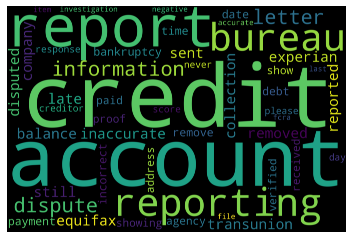

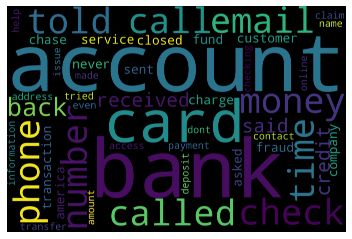

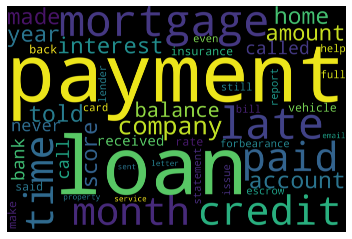

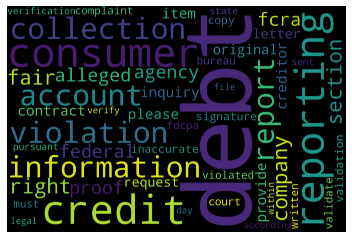

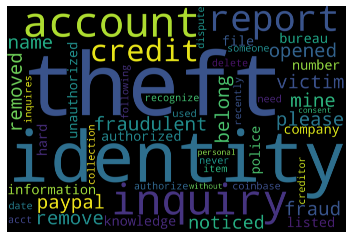

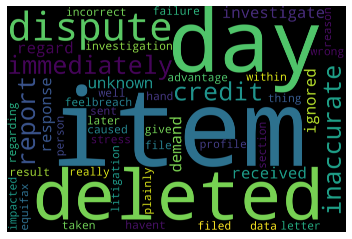

In [40]:
# Generate a word cloud image for given topic

def draw_word_cloud(index):
  imp_words_topic=""
  comp=lda_model.components_[index]
  vocab_comp = zip(vocab, comp)
  sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:50]
  for word in sorted_words:
    imp_words_topic=imp_words_topic+" "+word[0]

  wordcloud = WordCloud(width=6000, height=4000).generate(imp_words_topic)
  plt.figure( figsize=(5,5))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout()
  plt.show()

draw_word_cloud(0)
draw_word_cloud(1)
draw_word_cloud(2)
draw_word_cloud(3)
draw_word_cloud(4)
draw_word_cloud(5)    